<a href="https://colab.research.google.com/github/granantuin/LEVX_regression/blob/master/tensorflow_levx_regre_dir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
drive_metar="/content/drive/My Drive/Colab Notebooks/model_vs_data/Metar_2018/"
dr=[drive_4km,drive_1km,drive_metar]
y_data=pd.read_excel(dr[2]+"y_LEVX_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[2]+"x_LEVX.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]# delete station errors
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)
l0 = tf.keras.layers.Dense(units=6, input_shape=[9]) 
l1 = tf.keras.layers.Dense(units=1,)
model = tf.keras.Sequential([l0,l1])
model.summary()
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.1),metrics=["mae"])
history = model.fit(x_train, y_train, validation_split=0.2,epochs=200, verbose=False)
print("Finished training the model")

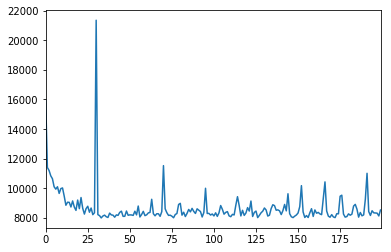

In [7]:
hist=pd.DataFrame(history.history)
hist["loss"].plot()

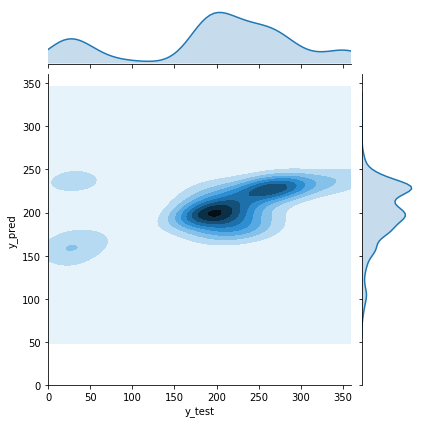

In [8]:
y_pred=model.predict(x_test)
y_pred=y_pred.reshape(1,-1)[0]
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,xlim=(0,360),ylim=(0,360), )

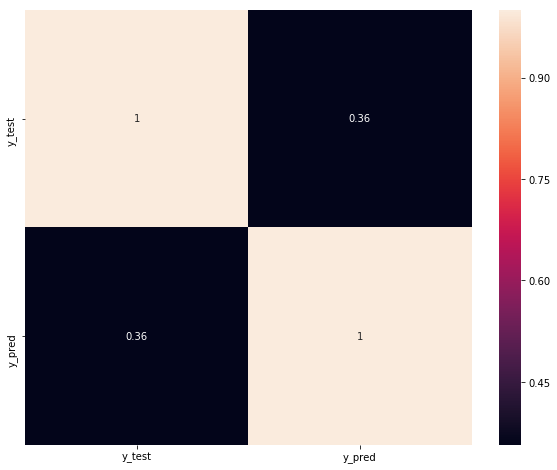

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]

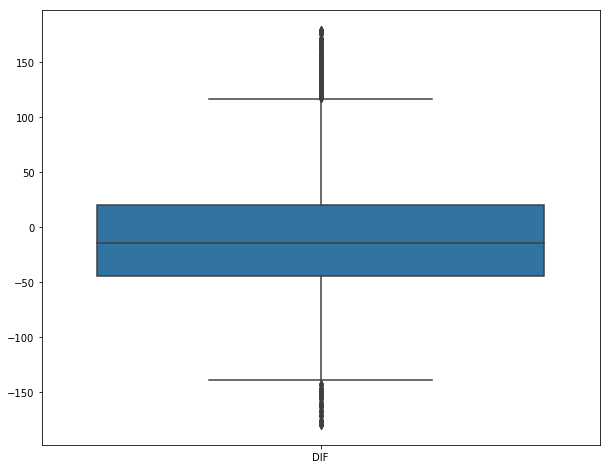

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])

In [12]:
df2.iloc[:,2:3].describe()

,DIF
count,1844.000000
mean,-3.626712
std,69.769756
min,-179.629517
25%,-43.744270
50%,-14.088509
75%,20.572769
max,179.717819
